Copyright (c) 2023, Douglas Santry
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, is permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR
ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [1]:
from math import sin as sine

import matplotlib.pyplot as plt

In [2]:
%run Algo3_3.py

In [3]:
ANN = ANN_Factory ([3, 2, 1])            # Build an ANN with topology...

In [4]:
ANN

{'Weights': [array([[0.31267273, 0.87181156],
         [0.16367026, 0.38562752],
         [0.31987739, 0.36162331]]),
  array([[0.58903327, 0.52513711, 0.38626107, 0.99557814],
         [0.58815545, 0.48866403, 0.60123932, 0.0879986 ]]),
  array([[0.57834059, 0.16218868, 0.7763404 ]])],
 'dL': [array([[0., 0.],
         [0., 0.],
         [0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0.]])],
 'topology': [3, 2, 1],
 'z': [array([[1.63437886],
         [0.55950035],
         [0.12555924]]),
  array([[2.05833592e-312],
         [2.33419537e-312]]),
  array([[0.]])]}

In [5]:
# Construct example data set.  Sine and its argument in radians.

data = []
for i in range (0,64):
    theta = np.random.uniform (0, np.pi/2)
    data.append ((theta, sine (theta)))
    
data = sorted (data)

In [6]:
# Naive Training loop

for i in range (0, 10000):
    
    loss = 0
    
    for datum in data:
        loss += ComputeLoss (ANN, datum[0], datum[1])
        
    if (i % 1000) == 0:
        print (loss/64)
        
    UpdateWeights (ANN)

0.050804158187611914
0.03950892781022567
0.036715446584610296
0.008783574143247935
0.0012473811521557432
0.0010200864994743767
0.0009657475455191725
0.0009225557563345011
0.0008838379685686485
0.0008488248520328026


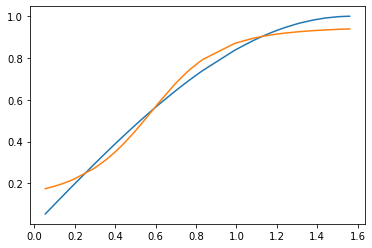

In [7]:
# Visualization of ground truth and training progress.

theta, ground = zip (*data)

sofar = []

for x in theta:
    sofar.append (ForwardPass (ANN, x))

plt.plot (theta, ground)
plt.plot (theta, sofar)

plt.show ()